### Import packages 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### 4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. After reading it in, inspect the first 10 rows and then inspect the last 10 rows.

In [2]:
# read GDP dataset 
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")

# inspect first 10 rows
print(gdp_df.head(10))

# inspect last 10 rows
print(gdp_df.tail(10))

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN
5     Afghanistan  2015  2068.265904              NaN
6     Afghanistan  2014  2102.384604              NaN
7     Afghanistan  2013  2116.465258              NaN
8     Afghanistan  2012  2075.491614              NaN
9     Afghanistan  2011  1904.559926              NaN
     Country or Area  Year        Value  Value Footnotes
7166        Zimbabwe  1999  2872.714795              NaN
7167        Zimbabwe  1998  2915.052992              NaN
7168        Zimbabwe  1997  2856.118188              NaN
7169        Zimbabwe  1996  2808.558556              NaN
7170        Zimbabwe  1995  2573.993785              NaN
7171        Zimbabwe  1994  2603.927369              NaN
7172   

### 5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [3]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value':'GDP_Per_Capita'})

### 6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

- 7176 rows 
- 3 columns 
- columns - indexes.base.Index

In [4]:
print(gdp_df.head())
rows = len(gdp_df.axes[0])
cols = len(gdp_df.axes[1])

print("\nRows: ", rows)
print("Columns: ", cols)

print(type(gdp_df.axes[0]))
print(type(gdp_df.axes[1]))

# If any of the columns are not the expected types, figure out why and fix it

       Country  Year  GDP_Per_Capita
0  Afghanistan  2020     1970.560169
1  Afghanistan  2019     2065.036235
2  Afghanistan  2018     2033.804389
3  Afghanistan  2017     2058.400221
4  Afghanistan  2016     2057.067978

Rows:  7176
Columns:  3
<class 'pandas.core.indexes.range.RangeIndex'>
<class 'pandas.core.indexes.base.Index'>


### 7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

The dataset starts from year 2020 and ends at year 1990, and it appears that there's an interval of one year. But there are 7176 observations in the dataset. 

In [5]:
print(gdp_df['Year'])

0       2020
1       2019
2       2018
3       2017
4       2016
        ... 
7171    1994
7172    1993
7173    1992
7174    1991
7175    1990
Name: Year, Length: 7176, dtype: int64


### 8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

- Number of countries: 242
- Least represented counties: Somalia and Djibouti with 8. They might have few observations because it is a third-world country with minimum resources or an unsafe government.  



In [6]:
# count how many countries are represented in dataset 
num_countries = len(gdp_df['Country'].unique())
print("Number of countries: ", num_countries)

# count occurrences of each country 
countries_count = gdp_df['Country'].value_counts()
print("\nCountry counts:")
print(countries_count)

# count of least represented countries (min)
countries_min = countries_count[countries_count == countries_count.min()]
print("\nLeast represented countries:")
print(countries_min)

Number of countries:  242

Country counts:
Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: Country, Length: 242, dtype: int64

Least represented countries:
Somalia     8
Djibouti    8
Name: Country, dtype: int64


### 9. Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`

In [7]:
gdp_2014 = gdp_df[gdp_df["Year"] == 2014] ## integer so no quotation marks
print(gdp_2014)

                          Country  Year  GDP_Per_Capita
6                     Afghanistan  2014     2102.384604
25    Africa Eastern and Southern  2014     3677.319414
56     Africa Western and Central  2014     4215.646000
87                        Albania  2014    11586.833878
118                       Algeria  2014    11512.690472
...                           ...   ...             ...
7031                      Vietnam  2014     7601.858491
7062           West Bank and Gaza  2014     5967.073437
7089                        World  2014    15224.439424
7120                       Zambia  2014     3450.037600
7151                     Zimbabwe  2014     2357.651166

[242 rows x 3 columns]


### 10. Use .describe() to find the summary statistics for GDP per capita in 2014

In [8]:
# Use `.describe()` to find the summary statistics for GDP per capita in 2014.
print('Summary Statistics for GDP per capita in 2014:')
print(gdp_2014["GDP_Per_Capita"].describe())

Summary Statistics for GDP per capita in 2014:
count       242.000000
mean      19612.875611
std       20961.714572
min         822.611195
25%        4702.212961
50%       12178.874687
75%       26461.384188
max      155201.740571
Name: GDP_Per_Capita, dtype: float64


### 11. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

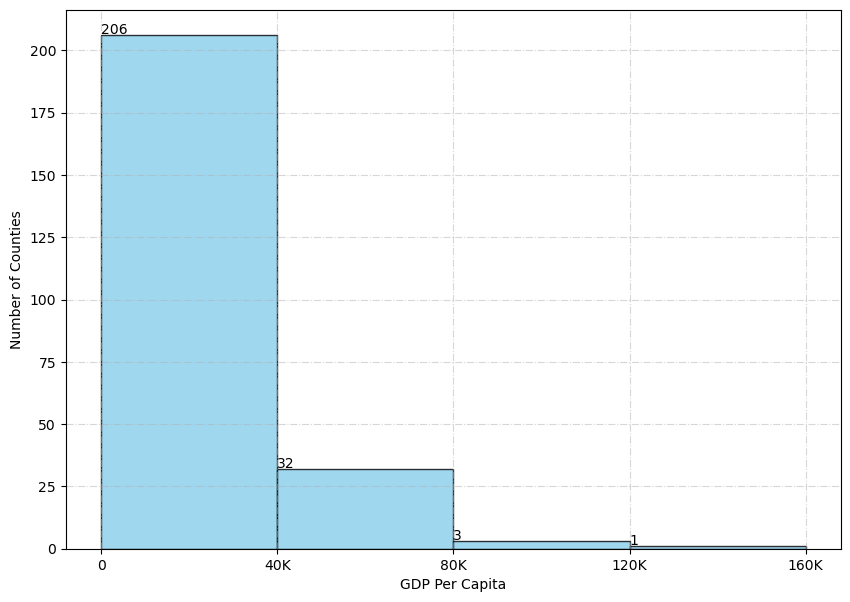

In [9]:
# create histogram plot
hist, bins, _ = plt.hist(gdp_2014["GDP_Per_Capita"], bins = 4, color = 'skyblue', edgecolor = 'black', range = (0, 160000), alpha = 0.8) #alpha = transparency
plt.ylabel('Number of Counties')
plt.xlabel('GDP Per Capita')
plt.grid(True, linestyle='-.',alpha=0.5)

# customize tick marks 
x_labels = [0, 40000,80000,120000,160000]
plt.xticks(x_labels, labels = [0,'40K','80K','120K','160K'])

# label the # of items in each bin 
for i in range(len(bins)-1): 
    plt.text(bins[i]+0.5,hist[i]+5, str(int(hist[i])), ha='left',va='top')
    
# change the size of histogram to fit bin labels
plt.gcf().set_size_inches(10,7) # (Width, height), doesn't seem to have any changes

plt.show()

### 12. Find the top 5 countries and bottom 5 countries by GDP per capita in 2018

In [10]:
# create new df called GDP_2018
gdp_2018 = gdp_df[gdp_df["Year"] == 2018]
print(gdp_2018)

# find top 5 countries 
top5_gdp2018 = gdp_2018.nlargest(5, "GDP_Per_Capita")
print('\nTop 5 Countries by GDP per capita in 2018:')
print(top5_gdp2018)

# find bottom 5 countries 
bottom5_gdp2018 = gdp_2018.nsmallest(5, "GDP_Per_Capita")
print('\nBottom 5 Countries by GDP per capita in 2018:')
print(bottom5_gdp2018)

                          Country  Year  GDP_Per_Capita
2                     Afghanistan  2018     2033.804389
21    Africa Eastern and Southern  2018     3697.317275
52     Africa Western and Central  2018     4132.592996
83                        Albania  2018    13317.092313
114                       Algeria  2018    11630.679409
...                           ...   ...             ...
7027                      Vietnam  2018     9548.700016
7058           West Bank and Gaza  2018     6318.210068
7085                        World  2018    16679.316815
7116                       Zambia  2018     3521.545978
7147                     Zimbabwe  2018     2497.136618

[242 rows x 3 columns]

Top 5 Countries by GDP per capita in 2018:
               Country  Year  GDP_Per_Capita
3915  Macao SAR, China  2018   132373.544079
3884        Luxembourg  2018   115049.926079
5722         Singapore  2018    98336.956494
5383             Qatar  2018    90970.060902
3073           Ireland  2018    837

### 13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2018 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2018. Save the result to a dataframe named gdp_pivoted.

In [11]:
# filter the df for 1990 amd 2018 
gdp_filter = gdp_df[gdp_df["Year"].isin([1990, 2018])]
print(gdp_filter)

# pivot data so row=country, column=yr, values=GDP
gdp_pivoted = gdp_filter.pivot_table(index='Country',columns='Year',values='GDP_Per_Capita') #index = rows

# drop any missing rows 
gdp_pivoted = gdp_pivoted.dropna(subset=[1990, 2018])
print(gdp_pivoted)

                          Country  Year  GDP_Per_Capita
2                     Afghanistan  2018     2033.804389
21    Africa Eastern and Southern  2018     3697.317275
49    Africa Eastern and Southern  1990     3083.976800
52     Africa Western and Central  2018     4132.592996
80     Africa Western and Central  1990     2810.341129
...                           ...   ...             ...
7113                        World  1990     9704.621768
7116                       Zambia  2018     3521.545978
7144                       Zambia  1990     2190.181724
7147                     Zimbabwe  2018     2497.136618
7175                     Zimbabwe  1990     2652.129209

[448 rows x 3 columns]
Year                                1990          2018
Country                                               
Africa Eastern and Southern  3083.976800   3697.317275
Africa Western and Central   2810.341129   4132.592996
Albania                      4827.034551  13317.092313
Algeria                      

### 14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2018. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [12]:
# create new column in gdp_pivoted 
# gdp_pivoted = gdp_pivoted.reset_index()
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2018]-gdp_pivoted[1990])/gdp_pivoted[1990]


In [13]:
print(gdp_pivoted)

Year                                1990          2018  Percent_Change
Country                                                               
Africa Eastern and Southern  3083.976800   3697.317275       19.887973
Africa Western and Central   2810.341129   4132.592996       47.049515
Albania                      4827.034551  13317.092313      175.885581
Algeria                      8746.340762  11630.679409       32.977661
Angola                       5758.950488   6982.129420       21.239615
...                                  ...           ...             ...
Vanuatu                      2855.554643   3093.086718        8.318247
Vietnam                      2066.372215   9548.700016      362.099710
World                        9704.621768  16679.316815       71.869829
Zambia                       2190.181724   3521.545978       60.787844
Zimbabwe                     2652.129209   2497.136618       -5.844081

[206 rows x 3 columns]


In [14]:
gdp_pivoted

Year,1990,2018,Percent_Change
Country,,,
Africa Eastern and Southern,3083.976800,3697.317275,19.887973
Africa Western and Central,2810.341129,4132.592996,47.049515
Albania,4827.034551,13317.092313,175.885581
Algeria,8746.340762,11630.679409,32.977661
Angola,5758.950488,6982.129420,21.239615
...,...,...,...
Vanuatu,2855.554643,3093.086718,8.318247
Vietnam,2066.372215,9548.700016,362.099710
World,9704.621768,16679.316815,71.869829


### 15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2018?

In [15]:
neg_change = (gdp_pivoted['Percent_Change'] < 0).sum()
print('Number of countries that experienced a negative percent change in GDP:')
print(neg_change)

# len(gdp_df['Country'].unique())

Number of countries that experienced a negative percent change in GDP:
17


### 16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.


Top 5 Countries with High Percent Change in GDP per capita:
Year                      1990          2018  Percent_Change
Country                                                     
Equatorial Guinea  1039.985049  20386.013868     1860.221820
China              1423.896348  15133.995618      962.857956
                Country  Year  GDP_Per_Capita
1875  Equatorial Guinea  2018    20386.013868
1876  Equatorial Guinea  2017    22550.958161
1877  Equatorial Guinea  2016    24827.032116
1878  Equatorial Guinea  2015    28313.433159
1879  Equatorial Guinea  2014    32436.553501
1880  Equatorial Guinea  2013    33678.737836
1881  Equatorial Guinea  2012    36671.357436
1882  Equatorial Guinea  2011    35377.736492
1883  Equatorial Guinea  2010    34732.219150
1884  Equatorial Guinea  2009    39914.175309
1885  Equatorial Guinea  2008    41249.486579
1886  Equatorial Guinea  2007    36685.343353
1887  Equatorial Guinea  2006    33330.890572
1888  Equatorial Guinea  2005    32390.207436
1889 

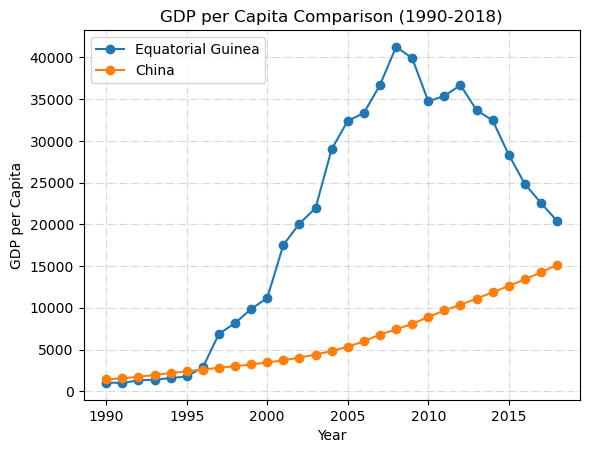

In [28]:
# check for top 2 countries with high % change
high_percentchange = gdp_pivoted.nlargest(2, "Percent_Change")
print('\nTop 5 Countries with High Percent Change in GDP per capita:')
print(high_percentchange)

# filter gdp_df for country #1 and years 1990-2018
EG = gdp_df[(gdp_df['Country'] == 'Equatorial Guinea') &  (gdp_df['Year'] >= 1990) & (gdp_df['Year'] <= 2018)]
print(EG)

# filter country #2
China = gdp_df[(gdp_df['Country'] == 'China') &  (gdp_df['Year'] >= 1990) & (gdp_df['Year'] <= 2018)]
print(China)

# create line plot for EG 
plt.plot(EG['Year'],EG['GDP_Per_Capita'], marker='o', linestyle='-',label='Equatorial Guinea')
plt.show

# create line plot for China 
plt.plot(China['Year'],China['GDP_Per_Capita'], marker='o', linestyle='-',label='China')
plt.show

# customize line plot
plt.title('GDP per Capita Comparison (1990-2018)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.grid(True, linestyle='-.', alpha = 0.5)
plt.legend()
plt.show()

### 17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [32]:
continents = pd.read_csv("../data/continents.csv")